In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

In [3]:
#Data Preparation

columns = ['EID', 'AbsT', 'RelT', 'NID', 'Temp', 'RelH', 'L1', 'L2', 'Occ', 'Act', 'Door', 'Win']
df_14 = pd.read_csv('datasets-location_C/room_climate-location_C-measurement14.csv', names=columns)
df_15 = pd.read_csv('datasets-location_C/room_climate-location_C-measurement15.csv', names=columns)
df = pd.concat([df_14, df_15], ignore_index=True)

df.shape

(3056, 12)

In [4]:

features = df[['Temp', 'RelH', 'L1', 'L2']]
label = df['Temp'].shift(-1)

X = features.iloc[:-1].values
y = label.iloc[:-1].values

n = len(X)
train_end = int(0.70 * n)
val_end = int(0.85 * n)

X_train, y_train = X[:train_end], y[:train_end]
X_val, y_val = X[train_end:val_end], y[train_end:val_end]
X_test, y_test = X[val_end:], y[val_end:]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [5]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [6]:
#a. Construct and train a deep learning model

model = Sequential([
    Dense(62, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(62, activation='relu'),
    Dense(1),
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_val_scaled, y_val), callbacks=[early_stopping])

Epoch 1/100
67/67 [==============================] - 1s 9ms/step - loss: 372.9062 - mae: 19.1496 - val_loss: 165.0440 - val_mae: 12.0580
Epoch 2/100
67/67 [==============================] - 0s 5ms/step - loss: 60.0295 - mae: 6.3756 - val_loss: 75.0091 - val_mae: 6.8961
Epoch 3/100
67/67 [==============================] - 0s 4ms/step - loss: 8.1675 - mae: 2.2173 - val_loss: 50.0540 - val_mae: 5.4654
Epoch 4/100
67/67 [==============================] - 1s 8ms/step - loss: 4.9200 - mae: 1.6049 - val_loss: 42.4106 - val_mae: 4.8568
Epoch 5/100
67/67 [==============================] - 0s 5ms/step - loss: 3.8211 - mae: 1.3572 - val_loss: 37.7874 - val_mae: 4.5542
Epoch 6/100
67/67 [==============================] - 0s 4ms/step - loss: 3.1036 - mae: 1.2081 - val_loss: 34.4948 - val_mae: 4.3045
Epoch 7/100
67/67 [==============================] - 0s 4ms/step - loss: 2.5899 - mae: 1.1043 - val_loss: 29.3340 - val_mae: 3.9974
Epoch 8/100
67/67 [==============================] - 0s 3ms/step - los

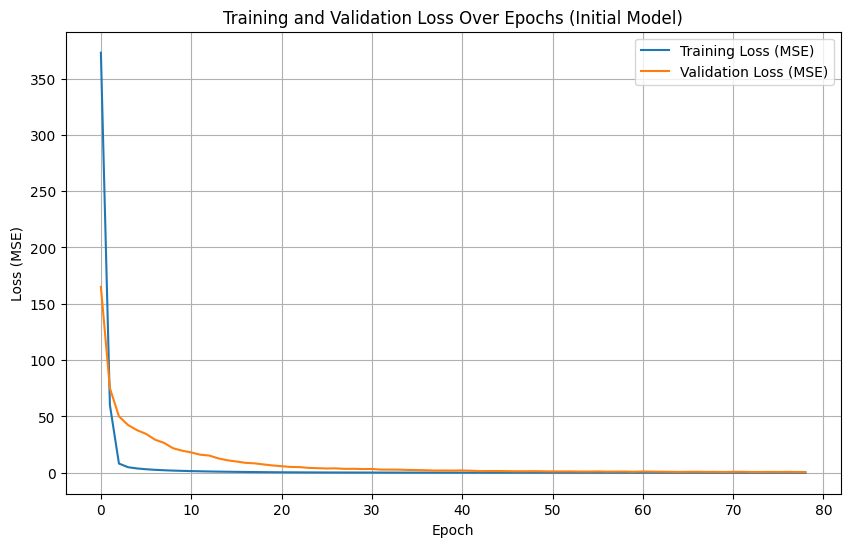

In [7]:
#b. Plot the training and validation losses over epochs    

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Training and Validation Loss Over Epochs (Initial Model)')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

Training berjalan hingga 79 epoch. Di beberapa epoch awal, Training dan validation loss berkurang dengan pesat yang artinya model dapat memperlajari hubungan dasar data. Kemudian pada epochs selanjutnya, validation loss berkurang dengan perlahan hingga akhirnya dihentikan oleh fungsi early_stopping.

In [8]:
from tensorflow.keras.regularizers import l2

improved_model = Sequential([
    Dense(128, activation='relu', kernel_regularizer=l2(0.0001), input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.0001)),
    Dense(32, activation='relu', kernel_regularizer=l2(0.0001)),
    Dense(1)
])

improved_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

improved_history = improved_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_val_scaled, y_val), callbacks=[early_stopping])

Epoch 1/100
67/67 [==============================] - 1s 8ms/step - loss: 306.3499 - mae: 16.4501 - val_loss: 90.2035 - val_mae: 7.1620
Epoch 2/100
67/67 [==============================] - 0s 4ms/step - loss: 12.4766 - mae: 2.5781 - val_loss: 46.4478 - val_mae: 5.3686
Epoch 3/100
67/67 [==============================] - 0s 5ms/step - loss: 5.0190 - mae: 1.5111 - val_loss: 35.4002 - val_mae: 4.5857
Epoch 4/100
67/67 [==============================] - 0s 4ms/step - loss: 3.2605 - mae: 1.2117 - val_loss: 28.3602 - val_mae: 4.1171
Epoch 5/100
67/67 [==============================] - 0s 5ms/step - loss: 2.2503 - mae: 1.0385 - val_loss: 23.6879 - val_mae: 3.6667
Epoch 6/100
67/67 [==============================] - 0s 4ms/step - loss: 1.5999 - mae: 0.8956 - val_loss: 18.9768 - val_mae: 3.3481
Epoch 7/100
67/67 [==============================] - 0s 4ms/step - loss: 1.2055 - mae: 0.7909 - val_loss: 17.2277 - val_mae: 3.0802
Epoch 8/100
67/67 [==============================] - 0s 4ms/step - loss:

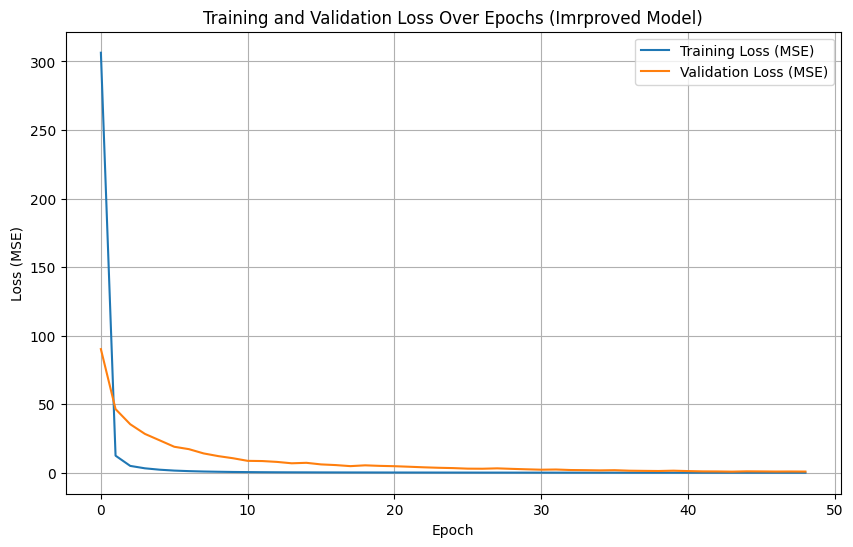

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(improved_history.history['loss'], label='Training Loss (MSE)')
plt.plot(improved_history.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Training and Validation Loss Over Epochs (Imrproved Model)')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

15/15 [==============================] - 0s 2ms/step
Mean Squared Error (MSE): 1.2469
Root Mean Squared Error (RMSE): 1.1167
Mean Absolute Error (MAE): 0.8784


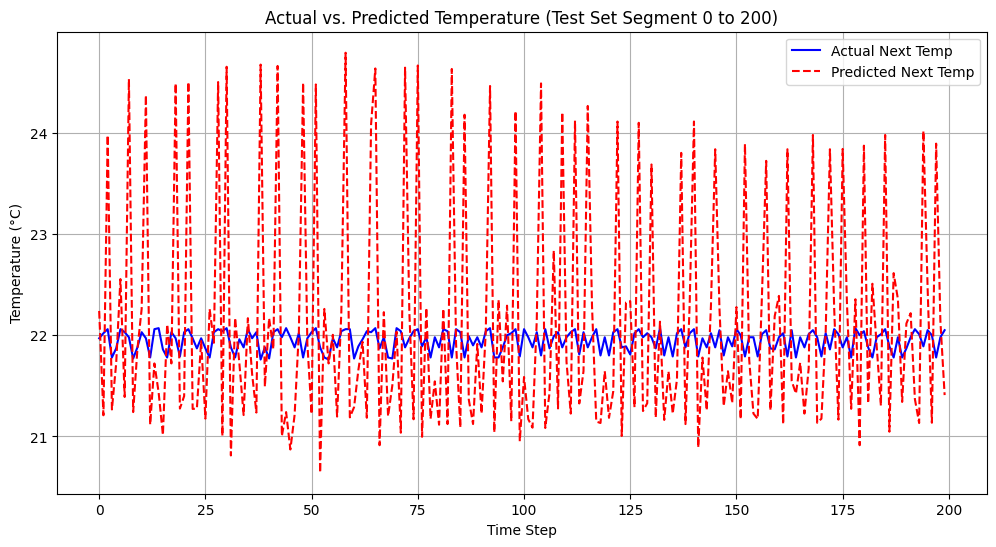

In [10]:
y_pred_test = improved_model.predict(X_test_scaled)

mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

print(f"Mean Squared Error (MSE): {mse_test:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.4f}")
print(f"Mean Absolute Error (MAE): {mae_test:.4f}")

plt.figure(figsize=(12, 6))
segment_start = 0
segment_end = 200
plt.plot(y_test[segment_start:segment_end], label='Actual Next Temp', color='blue')
plt.plot(y_pred_test[segment_start:segment_end], label='Predicted Next Temp', color='red', linestyle='--')
plt.title(f'Actual vs. Predicted Temperature (Test Set Segment {segment_start} to {segment_end})')
plt.xlabel('Time Step')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()